In [84]:
import tensorflow as tf

In [85]:
mnist = tf.keras.datasets.mnist # 28x28 handwritten digit dataset 0 - 9

In [86]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() # seperate the training and testing datasets

In [87]:
print(x_train.shape) # 28x28
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [88]:
import matplotlib.pyplot as plt

5


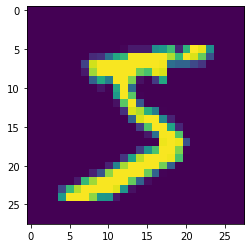

In [89]:
# show the corresponding x and y data
plt.imshow(x_train[0])
print(y_train[0])

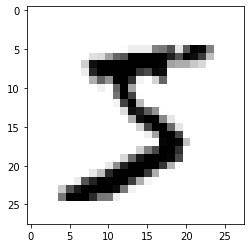

In [90]:
plt.imshow(x_train[0], cmap = "binary") # Using the binary color map

In [91]:
print (x_train[0]) # we can see that the outside of the digit represents black and the digit is white

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Pre processing

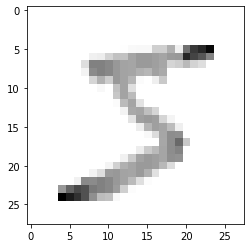

In [92]:
# the data needs to be normalized because the value range currently is 0 - 255
# this makes the data independent to the color of the image 
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_train, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [93]:
print(x_train[0]) # previously the values were in the range of 0 - 255, now the data has been normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [94]:
import numpy as np

## Resizing images for convolutional operatoin

In [95]:
img_size = 28
# Increasing the dimention of the image for kernel/filter operation
# -1 indicates the maximum size, this value was already -1 as default, seen by the printing of x_train.shape above
x_trainr = np.array(x_train).reshape(-1, img_size, img_size, 1)
x_testr = np.array(x_test).reshape(-1, img_size, img_size, 1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


# The Neural Network Architecture

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [163]:
# initiating neural network
model = Sequential()

# first convolution layer, has 64 filters
## Since we have 60 000 images in the array, we only want the single one
## the sequential model will take care of iteration trough the whole array
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:])) # input shape only needs to be defined in the first layer
model.add(Activation("relu"))  # non-linear activation function (returns max(0,x))
## We want to simplfy the information trought the model so rather than feeding each pixel,
## we are dividing the image into a 2x2 grid and representing the 2x2 grid with the highest value within the grid
model.add(MaxPooling2D(pool_size=(2,2))) 


# for this problem 3 convolutional layers are sufficient
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 
          
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

# Last fully connected layer, output must equal to the number of classes, 0 to 9 = 10
model.add(Dense(10))
model.add(Activation("softmax")) # better activation function for classification


In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_7 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

In [99]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [100]:
model.fit(x_trainr, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2661 - accuracy: 0.9182
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0866 - accuracy: 0.9736
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0614 - accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0494 - accuracy: 0.9847
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0397 - accuracy: 0.9873


In [101]:
# if validation accuracy < accuracy => overfitting. Solution is to droput layers

In [102]:
predictions = model.predict([x_testr])
print(predictions)

[[4.4183184e-06 6.1807709e-06 1.8040504e-07 ... 1.9590999e-07
  2.5289155e-05 1.7557475e-07]
 [9.9999821e-01 6.8806041e-09 2.5079351e-07 ... 1.1484200e-09
  7.3361278e-08 1.2595281e-07]
 [6.4638267e-10 2.9810992e-06 2.2316743e-07 ... 4.9708565e-06
  5.6340156e-07 5.8439543e-08]
 ...
 [3.7593833e-07 5.7873841e-08 2.1458132e-10 ... 1.6679416e-10
  1.5247277e-05 2.3553043e-06]
 [2.0306518e-02 1.3496382e-04 1.2346284e-04 ... 1.0138458e-07
  9.0707645e-06 4.4567551e-04]
 [8.8671377e-06 4.7093589e-08 7.7770856e-06 ... 5.6762963e-07
  9.9991715e-01 4.5872537e-05]]


4


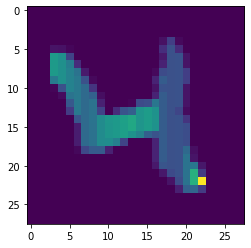

In [103]:
# Check if model has accurate answers
print(np.argmax(predictions[20]))
plt.imshow(x_test[20])

In [154]:
import cv2
img = cv2.imread('./seven.png')

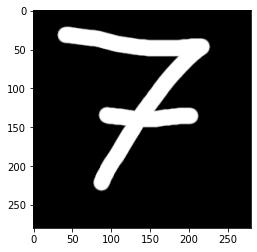

In [155]:
plt.imshow(img)

In [156]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [157]:
imgr = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [158]:
imgn = tf.keras.utils.normalize(imgr, axis = 1)

In [159]:
imgk = np.array(imgn).reshape(-1, img_size, img_size, 1) # for kernel operation

In [160]:
prediction = model.predict(imgk)

In [161]:
print (np.argmax(prediction))

4
